In [112]:
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np

In [113]:
# Featching financial data of "S&P 500","US Dollar Index","Crude Oil",'Gold',"Silver",'10 Years Treasury Yield','US Volatility Index' from Yahoo Finance

ticket_list_affecting=['^GSPC','DX-Y.NYB','CL=F','GC=F','SI=F','^TNX','^VIX']
ticket_name= ["S&P 500","US Dollar Index","Crude Oil",'Gold',"Silver",'10 Years Treasury Yield','US Volatility Index']
ticket_name=ticket_name[::-1]
df_list=[]

for i in ticket_list_affecting:
    
    yahoo_financials = YahooFinancials(i)
    data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                      end_date='2022-12-31', 
                                                      time_interval='daily')
    df_list.append(pd.DataFrame(data[i]['prices']).loc[:,['formatted_date','adjclose']].rename(columns={'adjclose':ticket_name.pop()}))

In [114]:
df=df_list.pop()
df.head()

,formatted_date,US Volatility Index
0,2000-01-03,24.209999
1,2000-01-04,27.010000
2,2000-01-05,26.410000
3,2000-01-06,25.730000
4,2000-01-07,21.719999


In [115]:
for i in df_list:
    df=df.merge(i,on='formatted_date',how='inner')

In [116]:
df.dropna(inplace=True)

In [117]:
df.head()

,formatted_date,US Volatility Index,S&P 500,US Dollar Index,Crude Oil,Gold,Silver,10 Years Treasury Yield
0,2000-08-30,17.690001,1502.589966,112.139999,33.400002,273.899994,4.930,5.800
1,2000-08-31,16.840000,1517.680054,112.599998,33.099998,278.299988,5.003,5.729
2,2000-09-01,17.530001,1520.770020,111.419998,33.380001,277.000000,5.004,5.675
3,2000-09-05,19.820000,1507.079956,112.410004,33.799999,275.799988,4.998,5.683
4,2000-09-06,20.790001,1492.250000,114.120003,34.950001,274.200012,4.983,5.712


In [118]:
feature=df.drop(columns=['formatted_date','S&P 500'])

In [119]:
feature.head()

,US Volatility Index,US Dollar Index,Crude Oil,Gold,Silver,10 Years Treasury Yield
0,17.690001,112.139999,33.400002,273.899994,4.930,5.800
1,16.840000,112.599998,33.099998,278.299988,5.003,5.729
2,17.530001,111.419998,33.380001,277.000000,5.004,5.675
3,19.820000,112.410004,33.799999,275.799988,4.998,5.683
4,20.790001,114.120003,34.950001,274.200012,4.983,5.712


In [120]:
target=df['S&P 500']
target.head()

0    1502.589966
1    1517.680054
2    1520.770020
3    1507.079956
4    1492.250000
Name: S&P 500, dtype: float64

In [121]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()
X=feature_scaler.fit_transform(feature)
feature_=pd.DataFrame(X,columns=feature.columns)

In [122]:
feature_.head()

,US Volatility Index,US Dollar Index,Crude Oil,Gold,Silver,10 Years Treasury Yield
0,0.116247,0.823280,0.388312,0.010465,0.020288,0.982941
1,0.104691,0.832560,0.386672,0.012915,0.021926,0.969776
2,0.114072,0.808755,0.388203,0.012191,0.021949,0.959763
3,0.145207,0.828727,0.390499,0.011523,0.021814,0.961246
4,0.158396,0.863224,0.396786,0.010632,0.021478,0.966623


In [123]:
target_ = pd.DataFrame({'S&P 500': target})
target_scaler = MinMaxScaler()
Y=target_scaler.fit_transform(target_)
target_['S&P 500'] = Y

In [124]:
target_.head()

,S&P 500
0,0.200499
1,0.204161
2,0.204911
3,0.201588
4,0.197989


In [125]:
# Random Default 75% Train and 25% Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(feature_,target_, random_state = 56)

In [126]:
# Prediction using Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [127]:
# Evaluation

print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.8184985522934707


In [128]:
#Predict for the test dataset

Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

In [129]:
# Calculating 'R-squared', 'Mean Squared Error', 'Root Mean Squared Error' and 'Mean Absolute Error' for Train and Test Dataset

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training Root Mean Squared Error: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training Mean Absolute Error: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test Root Mean Squared Error: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test Mean Absolute Error: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  0.82
Training Mean Squared Error: 0.01
Training Root Mean Squared Error:  0.1
Training Mean Absolute Error:  0.07
 
Test R-squared:  0.82
Test Mean Squared Error: 0.01
Test Root Mean Squared Error:  0.1
Test Mean Absolute Error:  0.07


In [130]:
# Predicted Test S&P 500 Dataset 

Y_test_pred=pd.DataFrame(Y_test_pred,index=Y_test.index)
Y_test_pred.sort_index(inplace=True)
Y_test_pred

,0
5,0.207727
14,0.228106
20,0.213747
30,0.161469
32,0.185735
...,...
5508,0.844263
5519,0.883239
5520,0.885277
5521,0.879357


In [131]:
# Original Test S&P 500 Dataset

Y_test.sort_index(inplace=True)
Y_test

,S&P 500
5,0.200479
14,0.188059
20,0.189746
30,0.158555
32,0.169438
...,...
5508,0.812392
5519,0.856969
5520,0.874659
5521,0.878782


In [132]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original S&P 500 vs Predicted S&P 500')

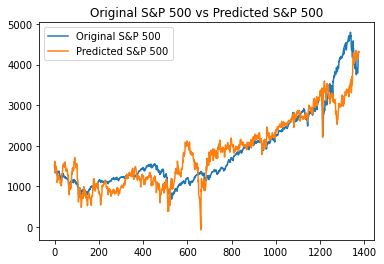

In [133]:
# Plotting Predicted vs Actual Prices

plt.plot(target_scaler.inverse_transform(Y_test))
plt.plot(target_scaler.inverse_transform(Y_test_pred))
plt.legend(['Original S&P 500','Predicted S&P 500'])
plt.title('Original S&P 500 vs Predicted S&P 500')